In [1]:
import matplotlib.pyplot as plt
import time
import random

Deliverable 01

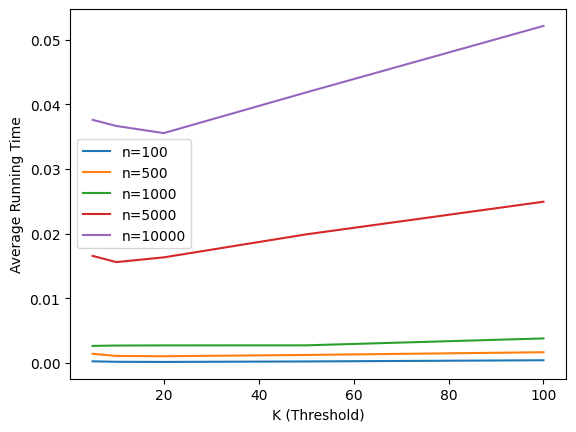

In [ ]:
def InsertionSort(A):
    # Iterate through the array from the second element
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        # Move elements of A[0..i-1] that are greater than key
        # to one position ahead of their current position
        while j >= 0 and key < A[j]:
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key
    return A


def Merge(left, right):
    result = []
    i = j = 0

    # Merge the two halves
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    # If any elements are left in either half, append them
    result.extend(left[i:])
    result.extend(right[j:])

    return result



def HybridSort(A, K):
    n = len(A)
    if n <= K:
        return InsertionSort(A)
    else:
        mid = n // 2
        left_sorted = HybridSort(A[:mid], K)
        right_sorted = HybridSort(A[mid:], K)
        return Merge(left_sorted, right_sorted)



# Generate random arrays and measure running time
def time_hybrid_sort(n, K):
    A = [random.randint(0, 1000) for _ in range(n)]
    start_time = time.time()
    HybridSort(A, K)
    return time.time() - start_time

# Plot average time for different values of K and n
Ks = [5, 10, 20, 50, 100]
ns = [100, 500, 1000, 5000, 10000]
for n in ns:
    times = []
    for K in Ks:
        avg_time = sum(time_hybrid_sort(n, K) for _ in range(10)) / 10
        times.append(avg_time)
    plt.plot(Ks, times, label=f'n={n}')

plt.xlabel('K (Threshold)')
plt.ylabel('Average Running Time')
plt.legend()
plt.show()


In [ ]:
# Test for correctness of the HybridSort implementation
def verify_hybrid_sort():
    # Test with random arrays of different sizes
    for i in range(1, 11):
        A = [random.randint(0, 100) for _ in range(i * 10)]  # Random array of size i * 10
        sorted_A = sorted(A)  # Use Python's built-in sorting for comparison
        K = random.randint(1, 10)  # Random threshold K
        hybrid_sorted_A = HybridSort(A, K)
        if hybrid_sorted_A == sorted_A:
            print(f"Test passed for array of size {len(A)} with K={K}")
        else:
            print(f"Test failed for array of size {len(A)} with K={K}")
            print(f"HybridSorted: {hybrid_sorted_A}")
            print(f"Expected: {sorted_A}")

# Run verification tests
verify_hybrid_sort()


Test passed for array of size 10 with K=5
Test passed for array of size 20 with K=4
Test passed for array of size 30 with K=2
Test passed for array of size 40 with K=2
Test passed for array of size 50 with K=3
Test passed for array of size 60 with K=5
Test passed for array of size 70 with K=1
Test passed for array of size 80 with K=4
Test passed for array of size 90 with K=9
Test passed for array of size 100 with K=7


Deliverable 02

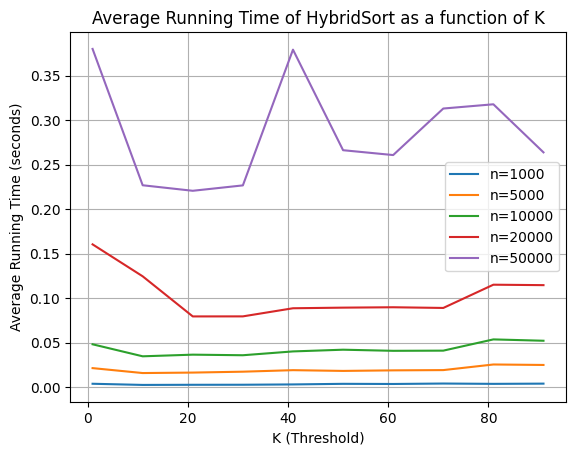

In [ ]:
# Function to measure the running time of HybridSort for a given array size n and threshold K
def time_hybrid_sort(n, K):
    A = [random.randint(0, 10000) for _ in range(n)]  # Generate random array of size n
    start_time = time.time()
    HybridSort(A, K)  # Run the HybridSort algorithm
    end_time = time.time()
    return end_time - start_time  # Return the elapsed time

# Function to plot the average running time as a function of K for different values of n
def plot_avg_time_vs_K():
    Ks = list(range(1, 101, 10))  # K values to test
    ns = [1000, 5000, 10000, 20000, 50000]  # Different values of n to test

    for n in ns:
        times = []
        for K in Ks:
            avg_time = sum(time_hybrid_sort(n, K) for _ in range(10)) / 10  # Average over 10 runs
            times.append(avg_time)
        plt.plot(Ks, times, label=f'n={n}')  # Plot for each n

    plt.xlabel('K (Threshold)')
    plt.ylabel('Average Running Time (seconds)')
    plt.title('Average Running Time of HybridSort as a function of K')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the plotting function
plot_avg_time_vs_K()


Deliverable 03

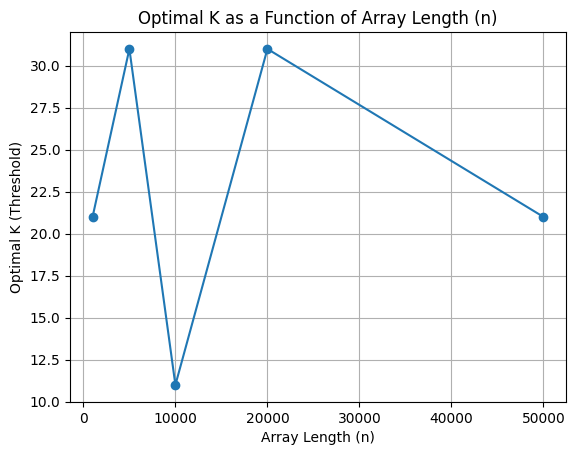

In [ ]:
# Function to measure the running time of HybridSort for random arrays
def time_hybrid_sort(n, K):
    A = [random.randint(0, 10000) for _ in range(n)]  # Generate random array of size n
    start_time = time.time()
    HybridSort(A, K)  # Run the HybridSort algorithm
    end_time = time.time()
    return end_time - start_time  # Return the elapsed time

# Function to identify the optimal value of K as a function of array length n
def find_optimal_K():
    Ks = list(range(1, 101, 10))  # K values to test
    ns = [1000, 5000, 10000, 20000, 50000]  # Different array lengths to test
    optimal_Ks = []

    for n in ns:
        best_time = float('inf')
        best_K = None
        for K in Ks:
            avg_time = sum(time_hybrid_sort(n, K) for _ in range(10)) / 10  # Average over 10 runs
            if avg_time < best_time:
                best_time = avg_time
                best_K = K
        optimal_Ks.append(best_K)  # Store the best K for the current n

    # Plot the relationship between n and the optimal K
    plt.plot(ns, optimal_Ks, marker='o')
    plt.xlabel('Array Length (n)')
    plt.ylabel('Optimal K (Threshold)')
    plt.title('Optimal K as a Function of Array Length (n)')
    plt.grid(True)
    plt.show()

# Run the function to find and plot the optimal K for each array length n
find_optimal_K()


Deliverable 04

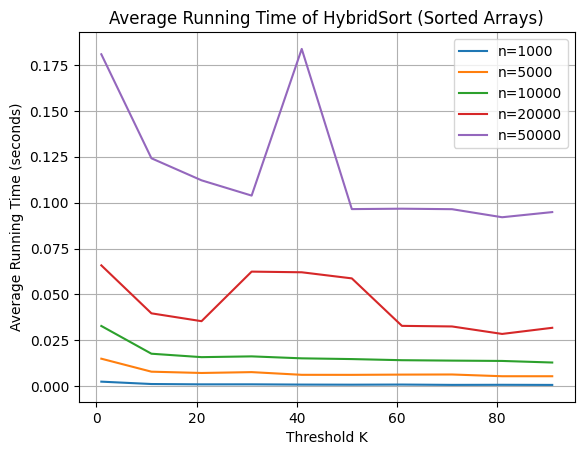

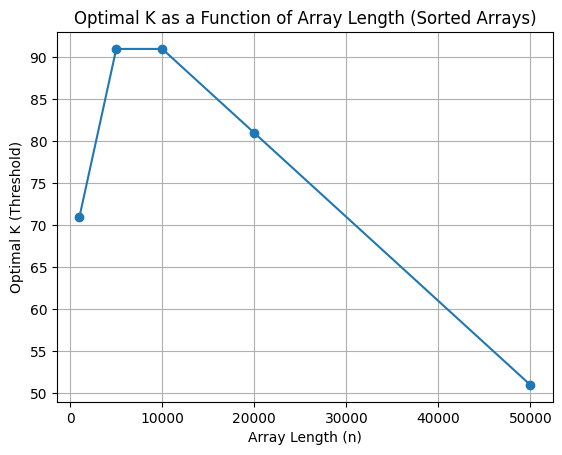

In [ ]:

# Function to measure the running time of HybridSort for sorted arrays
def time_hybrid_sort_sorted(n, K):
    A = sorted([random.randint(0, 10000) for _ in range(n)])  # Generate pre-sorted array of size n
    start_time = time.time()
    HybridSort(A, K)  # Run the HybridSort algorithm
    end_time = time.time()
    return end_time - start_time  # Return the elapsed time

# Deliverable 2 equivalent: Plot showing the average run time of HybridSort on sorted arrays
def plot_sorted_avg_runtime():
    Ks = list(range(1, 101, 10))  # Different K values to test
    ns = [1000, 5000, 10000, 20000, 50000]  # Different array sizes to test

    for n in ns:
        times = []
        for K in Ks:
            avg_time = sum(time_hybrid_sort_sorted(n, K) for _ in range(10)) / 10  # Average over 10 runs
            times.append(avg_time)
        plt.plot(Ks, times, label=f'n={n}')

    plt.xlabel('Threshold K')
    plt.ylabel('Average Running Time (seconds)')
    plt.title('Average Running Time of HybridSort (Sorted Arrays)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Deliverable 3 equivalent: Plot showing the optimal K for sorted arrays
def find_optimal_K_sorted():
    Ks = list(range(1, 101, 10))  # K values to test
    ns = [1000, 5000, 10000, 20000, 50000]  # Different array lengths to test
    optimal_Ks = []

    for n in ns:
        best_time = float('inf')
        best_K = None
        for K in Ks:
            avg_time = sum(time_hybrid_sort_sorted(n, K) for _ in range(10)) / 10  # Average over 10 runs
            if avg_time < best_time:
                best_time = avg_time
                best_K = K
        optimal_Ks.append(best_K)  # Store the best K for the current n

    # Plot the relationship between n and the optimal K
    plt.plot(ns, optimal_Ks, marker='o')
    plt.xlabel('Array Length (n)')
    plt.ylabel('Optimal K (Threshold)')
    plt.title('Optimal K as a Function of Array Length (Sorted Arrays)')
    plt.grid(True)
    plt.show()

# Run the functions for Deliverable 04
plot_sorted_avg_runtime()  # Plot for average runtime on sorted arrays
find_optimal_K_sorted()  # Plot for optimal K on sorted arrays
